In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

conn = sqlite3.connect('../8a.db')
c = conn.cursor()

In [2]:
c.execute("""
SELECT
  height,
  weight
FROM (
  SELECT
    cast(
        replace(height_string, 'cm', '') AS INT
    ) AS height,
    cast(
        replace(replace(weight_string, 'about', ''), 'kg', '') AS INT
    ) AS weight
  FROM Users
  WHERE height_string <> '' AND weight_string <> ''
)
WHERE
  height BETWEEN 120 AND 245;
""")

result_set = c.fetchall()
heights = zip(*result_set)[0]
weights = zip(*result_set)[1]
bmis = [w / (h / 100.0)**2 for (h, w) in zip(heights, weights)]

c.execute("""
SELECT
  height,
  weight
FROM (
  SELECT
    cast(
        replace(height_string, 'cm', '') AS INT
    )        AS height,
    cast(
        replace(replace(weight_string, 'about', ''), 'kg', '') AS INT
    )        AS weight,
    count(*) AS ascents
  FROM Boulders
    JOIN Users ON Boulders.user_id = Users.user_id
  WHERE
    grade IN ('8A', '8A+', '8B', '8B+', '8C', '8C+') AND
    height_string <> '' AND
    weight_string <> ''
  GROUP BY Users.user_id
  HAVING ascents >= 10
)
WHERE
  height BETWEEN 120 AND 245;
""")

result_set = c.fetchall()
heights_8a = zip(*result_set)[0]
weights_8a = zip(*result_set)[1]
bmis_8a = [w / (h / 100.0)**2 for (h, w) in zip(heights_8a, weights_8a)]

c.execute("""
SELECT
  height,
  weight
FROM (
  SELECT
    cast(
        replace(height_string, 'cm', '') AS INT
    )        AS height,
    cast(
        replace(replace(weight_string, 'about', ''), 'kg', '') AS INT
    )        AS weight,
    count(*) AS ascents
  FROM Boulders
    JOIN Users ON Boulders.user_id = Users.user_id
  WHERE
    grade IN ('8B', '8B+', '8C', '8C+') AND
    height_string <> '' AND
    weight_string <> ''
  GROUP BY Users.user_id
  HAVING ascents >= 10
)
WHERE
  height BETWEEN 120 AND 245;
""")

result_set = c.fetchall()
heights_8b = zip(*result_set)[0]
weights_8b = zip(*result_set)[1]
bmis_8b = [w / (h / 100.0)**2 for (h, w) in zip(heights_8b, weights_8b)]

In [3]:
print "{} total climbers, {} 8a climbers, {} 8b climbers.".format(len(heights), len(heights_8a), len(heights_8b))

24979 total climbers, 577 8a climbers, 97 8b climbers.


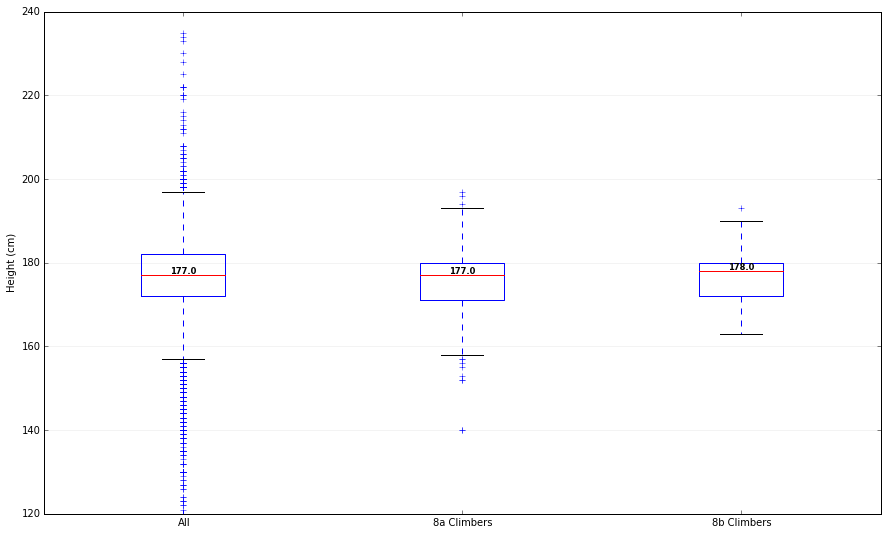

In [4]:
data = [heights, heights_8a, heights_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('Height (cm)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [5]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {} | {} | {} |".format(np.median(heights), np.median(heights_8a), np.median(heights_8b))
print "25th Percentile | {} | {} | {} |".format(
    np.percentile(heights, 25), np.percentile(heights_8a, 25), np.percentile(heights_8b, 25)
)
print "75th Percentile | {} | {} | {} |".format(
    np.percentile(heights, 75), np.percentile(heights_8a, 75), np.percentile(heights_8b, 75)
)


|All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 177.0 | 177.0 | 178.0 |
25th Percentile | 172.0 | 171.0 | 172.0 |
75th Percentile | 182.0 | 180.0 | 180.0 |


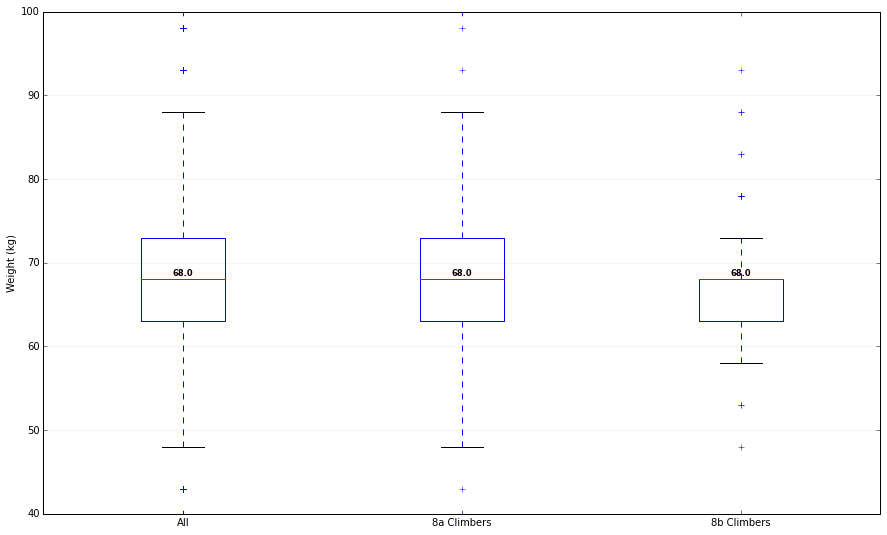

In [6]:
data = [weights, weights_8a, weights_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('Weight (kg)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [7]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {} | {} | {} |".format(np.median(weights), np.median(weights_8a), np.median(weights_8b))
print "25th Percentile | {} | {} | {} |".format(
    np.percentile(weights, 25), np.percentile(weights_8a, 25), np.percentile(weights_8b, 25)
)
print "75th Percentile | {} | {} | {} |".format(
    np.percentile(weights, 75), np.percentile(weights_8a, 75), np.percentile(weights_8b, 75)
)


|All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 68.0 | 68.0 | 68.0 |
25th Percentile | 63.0 | 63.0 | 63.0 |
75th Percentile | 73.0 | 73.0 | 68.0 |


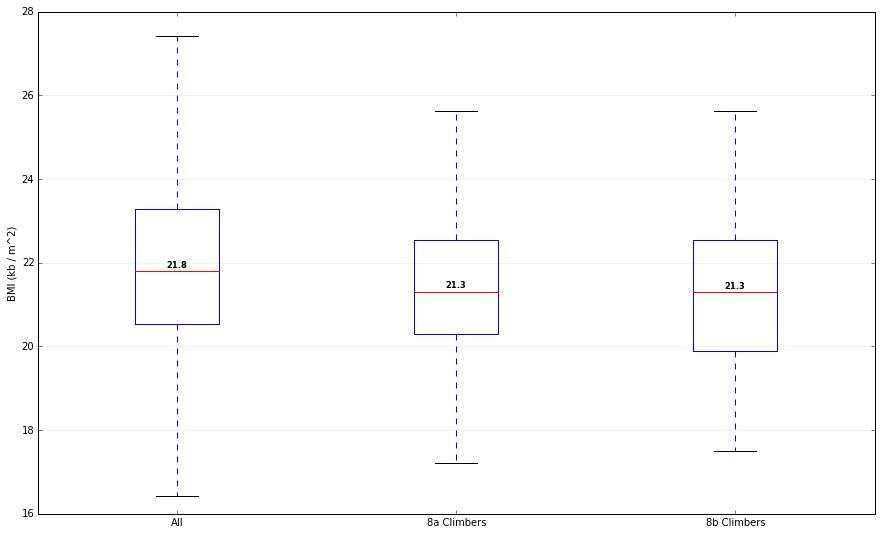

In [8]:
data = [bmis, bmis_8a, bmis_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data, sym='')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('BMI (kb / m^2)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [11]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {:.2f} | {:.2f} | {:.2f} |".format(np.median(bmis), np.median(bmis_8a), np.median(bmis_8b))
print "25th Percentile | {:.2f} | {:.2f} | {:.2f} |".format(
    np.percentile(bmis, 25), np.percentile(bmis_8a, 25), np.percentile(bmis_8b, 25)
)
print "75th Percentile | {:.2f} | {:.2f} | {:.2f} |".format(
    np.percentile(bmis, 75), np.percentile(bmis_8a, 75), np.percentile(bmis_8b, 75)
)


|All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 21.80 | 21.30 | 21.30 |
25th Percentile | 20.53 | 20.31 | 19.88 |
75th Percentile | 23.29 | 22.53 | 22.53 |
